In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
#import dtaset
data=pd.read_csv('C:\\BSY\\Data science\\python\\multi cluster irish\\IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


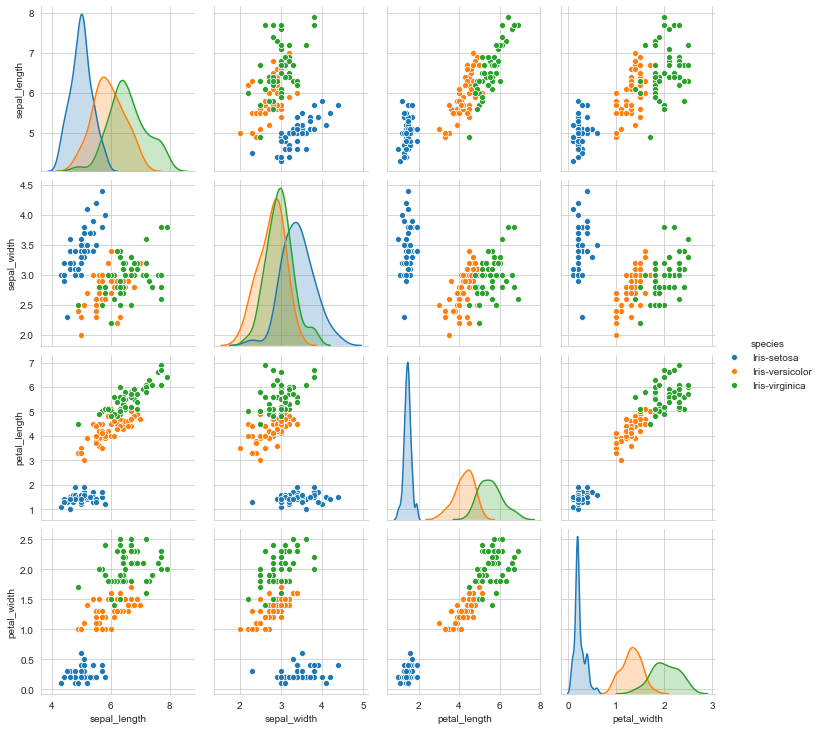

In [4]:
#visualization
sns.pairplot(data,hue='species')

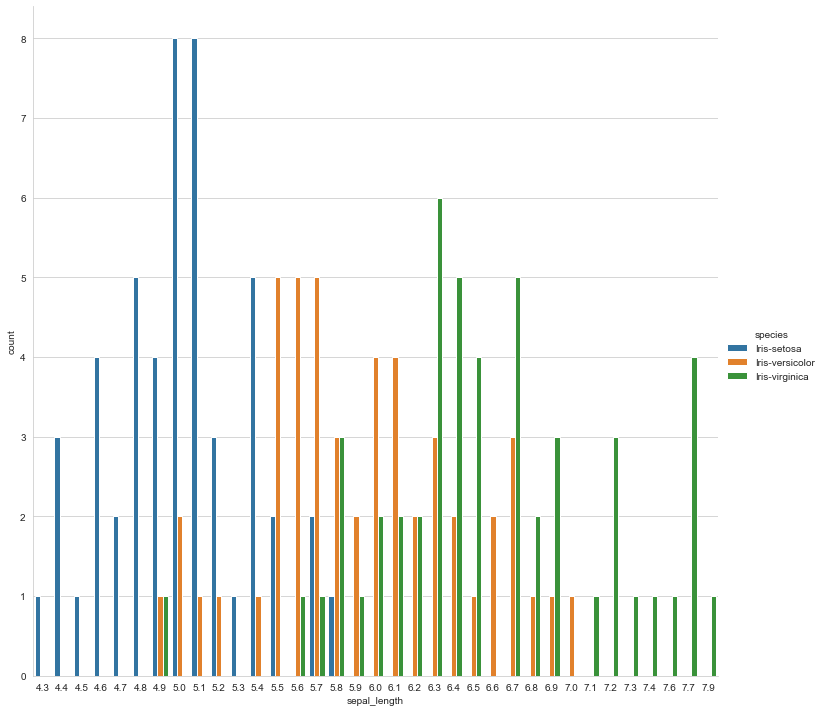

In [5]:
sns.catplot('sepal_length', data=data,kind='count',hue='species',height=10)

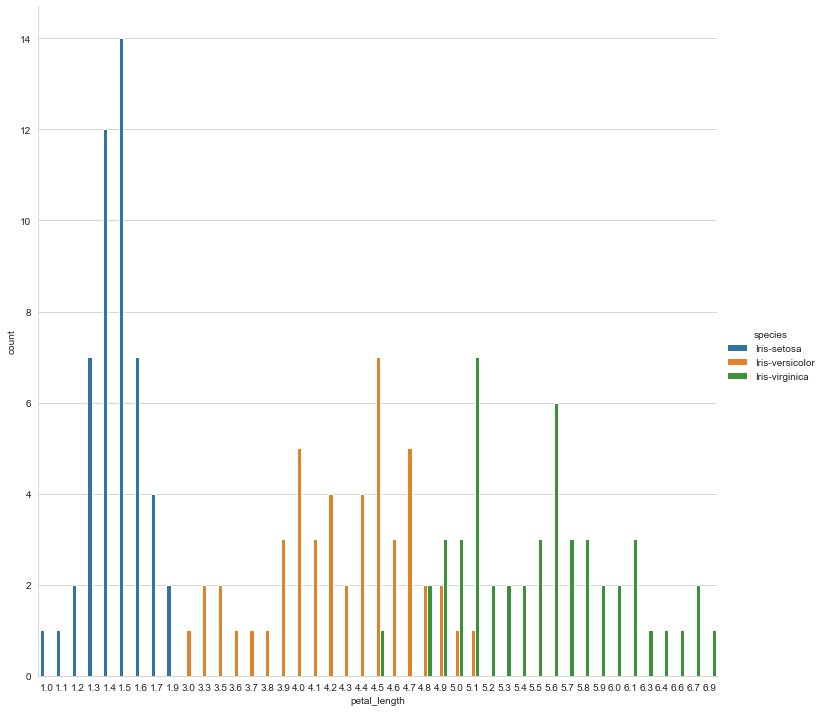

In [6]:
sns.catplot('petal_length', data=data,kind='count',hue='species',height=10)

In [7]:
#preparing data
X=data.drop(['species'],axis=1)
Y=data['species']

In [8]:
#cheking shape 
print(X.shape,Y.shape)

(150, 4) (150,)


In [9]:
#converting Y into and array for scikit learn using pandas function ravel
Y=np.ravel(Y)


In [18]:
#spliting the data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=2)

In [19]:
#creatingthe model and traning it
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#cheking the model on test data
Y_pred=Lr.predict(X_test)

the accuracy of the model is 0.9736842105263158
the confusion matrix
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 12]]


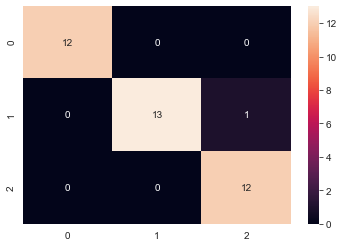

In [14]:
#cheking the model performance
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d')
print('the accuracy of the model is',metrics.accuracy_score(Y_test,Y_pred))
print('the confusion matrix\n',cm)

In [21]:
#Using KNN method
#importing the algo
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#cheking the model on test data
Y_pred=KNN.predict(X_test)

the accuracy of the model is 1.0
the confusion matrix
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


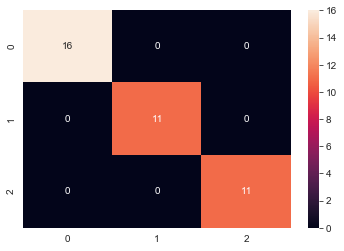

In [23]:
#cheking the model performance
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d')
print('the accuracy of the model is',metrics.accuracy_score(Y_test,Y_pred))
print('the confusion matrix\n',cm)

the accuracy of the model is 1.0
the confusion matrix
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


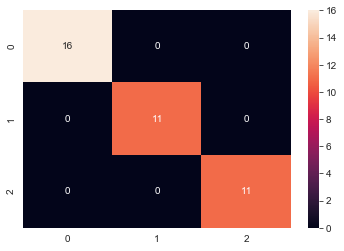

In [24]:
#cheking the model with another K value
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)

Y_pred=KNN.predict(X_test)

cm=metrics.confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d')
print('the accuracy of the model is',metrics.accuracy_score(Y_test,Y_pred))
print('the confusion matrix\n',cm)

In [27]:
#we againt hit a 100% accuracy to check it onc emore we can use a different random state and see
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=5)

the accuracy of the model is 0.9473684210526315
the confusion matrix
 [[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


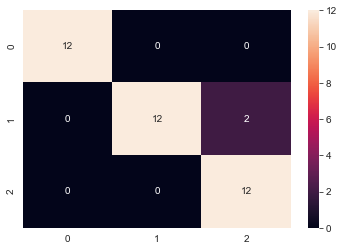

In [28]:

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)

Y_pred=KNN.predict(X_test)

cm=metrics.confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d')
print('the accuracy of the model is',metrics.accuracy_score(Y_test,Y_pred))
print('the confusion matrix\n',cm)

In [ ]:
#cool now we get only 94% accuracy ..so the final output is 
#slightly depended opon the way intial test & train group are selected 